A PCA is performed on the encoded features to see if there's any clustering between the binding and non-binding samples.

Starting to load and combine data from each file...
Loading data from: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/21_PARCLIP_MOV10_Sievers_hg19/Combined_RNA_Protein_Matrix.csv
Dropped 0 rows with missing values
Combined data shape is now: (4037569, 33)
Loading data from: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/25_CLIPSEQ_SFRS1_hg19/Combined_RNA_Protein_Matrix.csv
Dropped 0 rows with missing values
Combined data shape is now: (8075744, 33)
Loading data from: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/3_HITSCLIP_Ago2_binding_clusters/Combined_RNA_Protein_Matrix.csv
Dropped 0 rows with missing values
Combined data shape is now: (12112808, 33)
Loading data from: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/10_PARCLIP_ELAVL1A_hg19/Combined_RNA_Protein_Matrix.csv
Dropped 0 rows with missing values
Combined data shape is now: (16151387, 33)
Loading data from: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/6_CLIP-seq-eIF4AIII_1

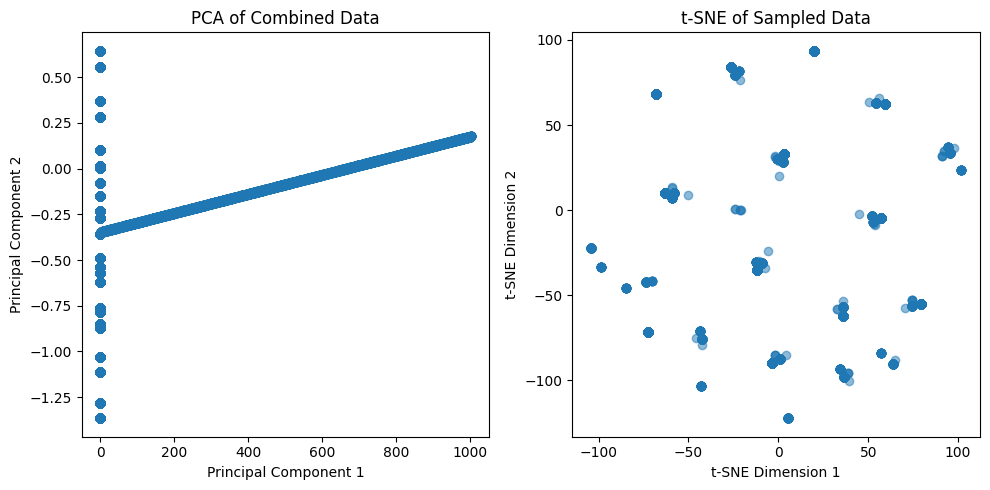

Plots for PCA and t-SNE generated.


In [1]:
import os
import glob
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define base path and pattern for file search dynamically
base_folder_path = os.path.join(os.getcwd(), "datasets", "clip")
file_pattern = os.path.join(base_folder_path, '**', 'Combined_RNA_Protein_Matrix.csv')
file_paths = glob.glob(file_pattern, recursive=True)

# Initialize an empty DataFrame for combined data
combined_data = pd.DataFrame()

print("Starting to load and combine data from each file...")

# Loop through each file and combine data
for file_path in file_paths:
    try:
        print(f"Loading data from: {file_path}")
        data = pd.read_csv(file_path)
        
        # Drop columns that are not needed for PCA and t-SNE
        data = data.drop(columns=['X', 'Y', 'Z', 'Sequence_Name', 'Position'], errors='ignore')
        
        # Drop any rows with missing values
        original_row_count = len(data)
        data = data.dropna()
        print(f"Dropped {original_row_count - len(data)} rows with missing values")
        
        # Append the cleaned data to combined_data
        combined_data = pd.concat([combined_data, data], ignore_index=True)
        print(f"Combined data shape is now: {combined_data.shape}")
    
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

print("Data loading and combination complete.")
print(f"Final shape of combined data: {combined_data.shape}")

# Check if combined_data is empty
if combined_data.empty:
    print("No data to process. Exiting.")
else:
    # Apply PCA to the combined dataset
    print("Starting PCA on the combined dataset...")
    try:
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(combined_data)
        print("PCA complete.")

        # Plot the combined PCA result
        print("Generating PCA plot...")
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA of Combined Data')
    except Exception as e:
        print(f"Error during PCA: {e}")

    # Take a random sample of the data for t-SNE
    sample_size = min(10000, len(combined_data))  # Adjust sample size to dataset size
    print(f"Sampling {sample_size} points for t-SNE.")
    sampled_data = combined_data.sample(n=sample_size, random_state=42)

    # Apply t-SNE on the sampled dataset
    print("Starting t-SNE on the sampled dataset...")
    try:
        tsne = TSNE(n_components=2, perplexity=30, random_state=42)
        tsne_components = tsne.fit_transform(sampled_data)
        print("t-SNE complete.")

        # Plot the t-SNE result
        print("Generating t-SNE plot...")
        plt.subplot(1, 2, 2)
        plt.scatter(tsne_components[:, 0], tsne_components[:, 1], alpha=0.5)
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.title('t-SNE of Sampled Data')

        plt.tight_layout()
        plt.show()
        print("Plots for PCA and t-SNE generated.")
    except Exception as e:
        print(f"Error during t-SNE: {e}")
